<a href="https://colab.research.google.com/github/triatebr/aprenda-python/blob/master/OPenData_TDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logos](https://mundogeo.com/wp-content/uploads/2014/01/Plataforma-Dados-Abertos.jpg)


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Tabela de solicitações de reconhecimento da condição de refugiado - 1994 (primeiro registro disponível) a 13 de março de 2019
# Fonte dos dados: http://dados.gov.br/dataset/comite-nacional-para-os-refugiados
url = 'https://www.justica.gov.br/seus-direitos/refugio/anexos/1990-a-2019-solicitacoes-de-reconhecimento-da-condicao-de-refugiado.xlsx'

In [0]:
dfs = pd.read_excel(url,enconding='latin',delimiter=";")

In [4]:
# Visualização das 5 primeiras linhas do dataframe, mas caso prefira mais linhas? insira o numero entre os '()'
# Costuma-se usar nome sugestivos para os Dataframes, com foco na facilidade de lembrar e usar
dfs.head()

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
0,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,12/2001,DF,1
1,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,01/2010,DF,1
2,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,03/2010,DF,2
3,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,03/2010,SP,2
4,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,08/2010,DF,1


In [5]:
# Quantidade de linhas e colunas do dataframe
dfs.shape

(11656, 5)

In [6]:
# Todas as colunas do dataframe
dfs.columns

Index(['Tipo de Alertas e Restrições', 'Nacionalidade', 'Mês/Ano', 'UF',
       'Quantidade'],
      dtype='object')

In [7]:
# Após a importação e visualização, como serão as colunas e características do nosso Dataframe?
dfs.dtypes

Tipo de Alertas e Restrições    object
Nacionalidade                   object
Mês/Ano                         object
UF                              object
Quantidade                       int64
dtype: object

Informação **NACIONALIDADE**

In [8]:
# Para sabermos os valores únicos de uma determinada coluna, usamos o 'unique()'
dfs['Nacionalidade'].unique()

array(['AFEGANISTÃO', 'ALBÂNIA', 'ALEMANHA', 'ANDORRA', 'ANGOLA',
       'APÁTRIDA', 'ARGENTINA', 'ARGÉLIA', 'ARMÊNIA', 'ARÁBIA SAUDITA',
       'AUSTRÁLIA', 'BANGLADESH', 'BARBADOS', 'BAREINE', 'BELARUS',
       'BELIZE', 'BENIN', 'BHUTAN', 'BOLÍVIA', 'BRASIL', 'BULGÁRIA',
       'BURKINA FASO', 'BURUNDI', 'BUTÃO', 'BÉLGICA',
       'BÓSNIA E HERZEGOVINA', 'CABO VERDE', 'CAMARÕES', 'CAMBOJA',
       'CANADÁ', 'CAZAQUISTÃO', 'CHILE', 'CHINA', 'COLÔMBIA', 'CONGO',
       'CORÉIA DO NORTE', 'CORÉIA DO SUL', 'COSTA DO MARFIM',
       'COSTA RICA', 'CROÁCIA', 'CUBA', 'DAOME', 'DINAMARCA', 'DJIBUTI',
       'DOMINICA', 'EGITO', 'EL SALVADOR', 'EMIRADOS ÁRABES', 'EQUADOR',
       'ERITRÉIA', 'ESLOVÁQUIA', 'ESPANHA', 'ESTADOS UNIDOS', 'ESTÔNIA',
       'ETIÓPIA', 'FIJI, ILHAS', 'FILIPINAS', 'FRANÇA', 'GABÃO', 'GANA',
       'GEÓRGIA', 'GRÉCIA', 'GUAM', 'GUATEMALA', 'GUIANA',
       'GUIANA FRANCESA', 'GUINÉ', 'GUINÉ BISSAU', 'GUINÉ EQUATORIAL',
       'GÂMBIA', 'HAITI', 'HONDURAS', 'HUNGRIA',

In [9]:
# Agrupando dados, inicialmente por Nacionalidade
dfs['Nacionalidade'].value_counts()

CUBA                              887
HAITI                             775
VENEZUELA                         665
COLÔMBIA                          556
SENEGAL                           469
SÍRIA                             466
BANGLADESH                        385
GUINÉ BISSAU                      371
ANGOLA                            343
CONGO                             337
PAQUISTÃO                         325
GANA                              298
NIGÉRIA                           294
REP. DOMINICANA                   289
LÍBANO                            255
GUINÉ                             219
MARROCOS                          178
IRAQUE                            164
PALESTINA                         150
ÍNDIA                             147
NACIONALIDADE INDEFINIDA          144
EGITO                             137
SERRA LEOA                        132
TOGO                              131
CAMARÕES                          124
SOMÁLIA                           122
REPÚBLICA DE

In [10]:
#selecionando uma Nacionalidade específica
dfs.loc[(dfs['Nacionalidade'] == 'BOLÍVIA')]

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
1082,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,02/2002,SP,1
1083,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,06/2002,SP,7
1084,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,07/2002,SP,1
1085,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,01/2006,SP,1
1086,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,07/2006,SP,1
1087,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,11/2008,AC,16
1088,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,11/2008,DF,3
1089,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,11/2008,RO,3
1090,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,12/2008,AC,35
1091,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,12/2008,DF,5


In [11]:
dfs.loc[(dfs['Nacionalidade'] == 'BOLÍVIA')  & (dfs['UF'] =='AM')]

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
1157,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,10/2016,AM,1
1169,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,01/2018,AM,1
1173,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,05/2018,AM,1
1178,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,07/2018,AM,1
1179,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,08/2018,AM,1
1184,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,10/2018,AM,4


In [12]:
#selecionando + de 1 Nacionalidade específica
dfs.loc[(dfs['Nacionalidade'] == 'UZBEQUISTÃO')  | (dfs['Nacionalidade'] =='ESTÔNIA')]

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
3960,SOLICITAÇÃO DE REFÚGIO,ESTÔNIA,12/2017,AM,1
10693,SOLICITAÇÃO DE REFÚGIO,UZBEQUISTÃO,07/2009,DF,1
10694,SOLICITAÇÃO DE REFÚGIO,UZBEQUISTÃO,06/2018,SP,2


In [13]:
# Agrupando dados por Estado
dfs['UF'].value_counts()

SP    3762
DF    1296
RJ     992
PR     884
RS     677
SC     672
AM     587
RR     574
AC     422
MS     273
MG     221
CE     196
GO     175
MT     163
BA     112
RO     109
PA     103
ES      86
PE      81
RN      62
AP      57
MA      38
PB      33
TO      30
AL      25
SE      18
PI       8
Name: UF, dtype: int64

In [14]:
dfs['UF'].value_counts(dropna=False, normalize=True)

SP    0.322752
DF    0.111187
RJ    0.085106
PR    0.075841
RS    0.058082
SC    0.057653
AM    0.050360
RR    0.049245
AC    0.036205
MS    0.023421
MG    0.018960
CE    0.016815
GO    0.015014
MT    0.013984
BA    0.009609
RO    0.009351
PA    0.008837
ES    0.007378
PE    0.006949
RN    0.005319
AP    0.004890
MA    0.003260
PB    0.002831
TO    0.002574
AL    0.002145
SE    0.001544
PI    0.000686
Name: UF, dtype: float64

![logos](https://d1nhio0ox7pgb.cloudfront.net/_img/o_collection_png/green_dark_grey/256x256/plain/table.png)

Outro **Dataframe** agora ...

In [0]:
# Tabela com decisões sobre pedidos de reconhecimento da condição de refugiado - ACNUR (1993-1997) e Conare (1998 a janeiro de 2019)
# Fonte dos dados: http://dados.gov.br/dataset/comite-nacional-para-os-refugiados
url1 = 'https://www.justica.gov.br/seus-direitos/refugio/anexos/decisoes-conare-ate-jan-2019.xlsx'

In [0]:
# Vamos utilizar os dados de 2019, no arquivo Excel há uma ABA chamada 'jan-2019'
df19 = pd.read_excel(url1,enconding='latin',delimiter=";", sheet_name='jan-2019')

In [17]:
df19.head()

,TOTAL= 115,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
0,NaN,ELIGIBILIDADE - DEFERIDO,2014-11-05,PAQUISTÃO,M,1987,BRASÍLIA,2019-01-25
1,NaN,ELIGIBILIDADE - DEFERIDO,2017-04-19,CUBA,M,1996,RECIFE,2019-01-25
2,NaN,ELIGIBILIDADE - DEFERIDO,2015-09-25,QUÊNIA,F,2002,BELO HORIZONTE,2019-01-25
3,NaN,ELIGIBILIDADE - DEFERIDO,2015-09-25,QUÊNIA,F,2007,BELO HORIZONTE,2019-01-25
4,NaN,ELIGIBILIDADE - DEFERIDO,2015-09-25,QUÊNIA,M,2012,BELO HORIZONTE,2019-01-25


In [0]:
df19 = df19.drop(['TOTAL= 115'], axis=1)

In [19]:
# quantidade de linhas e colunas do dataframe
df19.shape

(115, 7)

In [20]:
# as primeiras 5 linhas
df19.head()

,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
0,ELIGIBILIDADE - DEFERIDO,2014-11-05,PAQUISTÃO,M,1987,BRASÍLIA,2019-01-25
1,ELIGIBILIDADE - DEFERIDO,2017-04-19,CUBA,M,1996,RECIFE,2019-01-25
2,ELIGIBILIDADE - DEFERIDO,2015-09-25,QUÊNIA,F,2002,BELO HORIZONTE,2019-01-25
3,ELIGIBILIDADE - DEFERIDO,2015-09-25,QUÊNIA,F,2007,BELO HORIZONTE,2019-01-25
4,ELIGIBILIDADE - DEFERIDO,2015-09-25,QUÊNIA,M,2012,BELO HORIZONTE,2019-01-25


In [21]:
# após a importação e visualização, como serão as colunas e características do nosso Dataframe?
df19.dtypes

STATUS                        object
DATA SOLICITAÇÃO      datetime64[ns]
PAÍS DE ORIGEM                object
GÊNERO                        object
ANO DE NASCIMENTO              int64
CIDADE SOLICITAÇÃO            object
DATA DA  DECISÃO      datetime64[ns]
dtype: object

In [22]:
df19['PAÍS DE ORIGEM'].value_counts()

SÍRIA                 41
SENEGAL               11
ANGOLA                 9
QUÊNIA                 9
BANGLADESH             8
VENEZUELA              6
CUBA                   4
REP. DEM. DO CONGO     4
UCRÂNIA                3
PAQUISTÃO              2
ÁFRICA DO SUL          2
NIGÉRIA                2
SERRA LEOA             2
PALESTINA              1
HAITI                  1
TOGO                   1
GUINÉ-BISSAU           1
GÂMBIA                 1
MALI                   1
COLÔMBIA               1
TUNÍSIA                1
AFEGANISTAO            1
EGITO                  1
EQUADOR                1
GUIANA                 1
Name: PAÍS DE ORIGEM, dtype: int64

In [23]:
#selecionando uma Nacionalidade específica
df19.loc[(df19['PAÍS DE ORIGEM'] == 'CUBA')]

,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
1,ELIGIBILIDADE - DEFERIDO,2017-04-19,CUBA,M,1996,RECIFE,2019-01-25
63,EXTENSÃO DOS EFEITOS DA CONDIÇÃO DE REFUGIADO ...,2017-03-16,CUBA,F,2007,PERNAMBUCO,2019-01-25
64,EXTENSÃO DOS EFEITOS DA CONDIÇÃO DE REFUGIADO ...,2017-03-16,CUBA,F,1984,PERNAMBUCO,2019-01-25
110,EXTINÇÃO (DESISTÊNCIA SEM FORMULÁRIO PRÓPRIO),2016-10-13,CUBA,M,1984,BOA VISTA,2019-01-25


In [24]:
df19.loc[(df19['PAÍS DE ORIGEM'] == 'ANGOLA')]

,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
77,ELIGIBILIDADE - INDEFERIDO,2015-06-26,ANGOLA,M,1970,SÃO PAULO,2019-01-25
80,ELIGIBILIDADE - INDEFERIDO,2015-04-05,ANGOLA,M,1975,SÃO PAULO,2019-01-25
81,ELIGIBILIDADE - INDEFERIDO,2018-08-27,ANGOLA,M,1995,SÃO PAULO,2019-01-25
83,ELIGIBILIDADE - INDEFERIDO,2017-09-13,ANGOLA,F,1981,SÃO PAULO,2019-01-25
103,ELIGIBILIDADE - INDEFERIDO,2017-09-05,ANGOLA,M,1976,MACAÉ,2019-01-25
104,ELIGIBILIDADE - INDEFERIDO,2016-01-14,ANGOLA,F,1992,CAMPINAS,2019-01-25
106,ELIGIBILIDADE - INDEFERIDO,2016-09-22,ANGOLA,M,1995,SÃO PAULO,2019-01-25
107,ELIGIBILIDADE - INDEFERIDO,2015-05-19,ANGOLA,M,1988,SÃO PAULO,2019-01-25
108,ELIGIBILIDADE - INDEFERIDO,2016-09-03,ANGOLA,M,1992,CAMPINAS,2019-01-25


In [25]:
df19['CIDADE SOLICITAÇÃO'].value_counts()

SÃO PAULO            49
BELO HORIZONTE       10
FLORIANÓPOLIS         8
BRASILÉIA             5
CAXIAS DO SUL         5
CAMPINAS              3
RIO BRANCO            3
MANAUS                3
GUARAPUAVA            2
GUARULHOS             2
CURITIBA              2
RIO DE JANEIRO        2
PACARAÍMA             2
PERNAMBUCO            2
GUAÍRA                2
BRASÍLIA              2
VITÓRIA               1
JOÃO PESSOA           1
ANÁPOLIS              1
ERECHIM               1
VITÓRIA DO PALMAR     1
FORTALEZA             1
RECIFE                1
NATAL                 1
BOA VISTA             1
BARRACÃO              1
AMAZONAS              1
MACAÉ                 1
MARABÁ                1
Name: CIDADE SOLICITAÇÃO, dtype: int64

In [26]:
df19['STATUS'].value_counts()

ELIGIBILIDADE - DEFERIDO                                    61
ELIGIBILIDADE - INDEFERIDO                                  45
EXTINÇÃO (DESISTÊNCIA SEM FORMULÁRIO PRÓPRIO)                5
EXTENSÃO DOS EFEITOS DA CONDIÇÃO DE REFUGIADO - DEFERIDO     4
Name: STATUS, dtype: int64

In [27]:
df19['GÊNERO'].value_counts()

M    88
F    27
Name: GÊNERO, dtype: int64

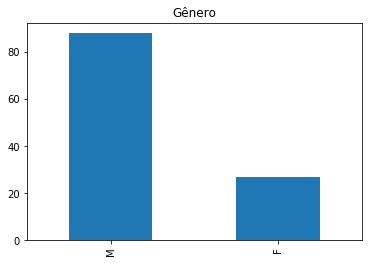

In [28]:
df19["GÊNERO"].value_counts().plot.bar(title="Gênero")
plt.show()

In [29]:
df19['STATUS'].value_counts(dropna=False, normalize=True)

ELIGIBILIDADE - DEFERIDO                                    0.530435
ELIGIBILIDADE - INDEFERIDO                                  0.391304
EXTINÇÃO (DESISTÊNCIA SEM FORMULÁRIO PRÓPRIO)               0.043478
EXTENSÃO DOS EFEITOS DA CONDIÇÃO DE REFUGIADO - DEFERIDO    0.034783
Name: STATUS, dtype: float64

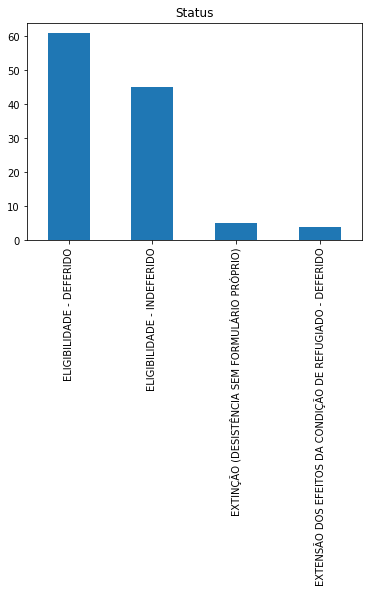

In [30]:
df19["STATUS"].value_counts().plot.bar(title="Status")
plt.show()

In [31]:
df19.loc[(df19['STATUS'] == 'ELIGIBILIDADE - INDEFERIDO')]

,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
65,ELIGIBILIDADE - INDEFERIDO,2015-06-12,ÁFRICA DO SUL,F,1964,SÃO PAULO,2019-01-25
66,ELIGIBILIDADE - INDEFERIDO,2017-12-07,REP. DEM. DO CONGO,M,1989,JOÃO PESSOA,2019-01-25
67,ELIGIBILIDADE - INDEFERIDO,2017-11-01,TUNÍSIA,M,1996,SÃO PAULO,2019-01-25
68,ELIGIBILIDADE - INDEFERIDO,2015-11-04,REP. DEM. DO CONGO,M,1980,SÃO PAULO,2019-01-25
69,ELIGIBILIDADE - INDEFERIDO,2015-12-01,MALI,M,1985,SÃO PAULO,2019-01-25
70,ELIGIBILIDADE - INDEFERIDO,2014-07-20,REP. DEM. DO CONGO,M,1985,SÃO PAULO,2019-01-25
71,ELIGIBILIDADE - INDEFERIDO,2012-01-10,QUÊNIA,F,2010,SÃO PAULO,2019-01-25
72,ELIGIBILIDADE - INDEFERIDO,2014-07-29,GUIANA,M,1985,GUARULHOS,2019-01-25
73,ELIGIBILIDADE - INDEFERIDO,2016-06-09,GUINÉ-BISSAU,M,1981,SÃO PAULO,2019-01-25
74,ELIGIBILIDADE - INDEFERIDO,2014-12-31,BANGLADESH,M,1994,CAXIAS DO SUL,2019-01-25
